In [2]:
import pandas as pd
import nltk
import spacy
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
inpath = "output_0211_name_standardized.csv"
inpath = "output_2022-03-12_name_standardized.csv"
inpath = "output_2022-03-12.csv"

df = pd.read_csv(inpath) #.iloc[0:50]

Calculate number of characters and number of words in the body.
Note that there are spelling errors, and words separated by blank spaces that should not be there.
Threads have been removed, but not attachments, although emails with attachments are flagged. Therefore, we could also 
compute statistics just for the emails without attachments, to get more realistic stats. 

In [6]:
bodies = df.Body
bodies[0]

"['Response.pdf', 'Brooks, attached is our response to RFIs 008, 042, 043, and 044.', 'Shane A. Moniz, AIA', 'Architect', 'Conn & Associates, Inc., Architects', '1960-C Buford Boulevard', 'Tallahassee, Florida 32308', 'p 850-878-8784', 'm 850-445-4056', 'smoniz@connandassociates.com', 'NUMBER:', 'REQUEST FOR INFORMATION 003', 'Date: March 2, 2015 PROJECT The Edison Restaurant Cascades Park', 'REFERENCE Project 0500', 'To: Shane Moniz']"

In [7]:
df.shape[0]

71143

In [8]:
list(bodies)[0]

"['Response.pdf', 'Brooks, attached is our response to RFIs 008, 042, 043, and 044.', 'Shane A. Moniz, AIA', 'Architect', 'Conn & Associates, Inc., Architects', '1960-C Buford Boulevard', 'Tallahassee, Florida 32308', 'p 850-878-8784', 'm 850-445-4056', 'smoniz@connandassociates.com', 'NUMBER:', 'REQUEST FOR INFORMATION 003', 'Date: March 2, 2015 PROJECT The Edison Restaurant Cascades Park', 'REFERENCE Project 0500', 'To: Shane Moniz']"

In [9]:
eval(bodies[0])

['Response.pdf',
 'Brooks, attached is our response to RFIs 008, 042, 043, and 044.',
 'Shane A. Moniz, AIA',
 'Architect',
 'Conn & Associates, Inc., Architects',
 '1960-C Buford Boulevard',
 'Tallahassee, Florida 32308',
 'p 850-878-8784',
 'm 850-445-4056',
 'smoniz@connandassociates.com',
 'NUMBER:',
 'REQUEST FOR INFORMATION 003',
 'Date: March 2, 2015 PROJECT The Edison Restaurant Cascades Park',
 'REFERENCE Project 0500',
 'To: Shane Moniz']

In [10]:
nb_words = []
nb_chars = []
body_len = []
body_list = []

# print("bodies columns: ", bodies.columns)
for i, row in enumerate(bodies):
    body = eval(row)
    body = " ".join(body)
    words = body.split(" ")
    text = "".join(words)
    if i < 3: 
        #print("-> row: ", row)
        # print("-> body: ", body)
        print("-> row.Body: ", df.iloc[i].Body)
        print("-> type(body): ", type(body))
    body_list.append(body)
    # print("len(body_list): ", len(body), len(body_list))
    body_len.append(len(body))
    nb_words.append(len(words))
    nb_chars.append(len(text))
len(body_list), len(body_len), len(nb_words), len(nb_chars)

-> row.Body:  ['Response.pdf', 'Brooks, attached is our response to RFIs 008, 042, 043, and 044.', 'Shane A. Moniz, AIA', 'Architect', 'Conn & Associates, Inc., Architects', '1960-C Buford Boulevard', 'Tallahassee, Florida 32308', 'p 850-878-8784', 'm 850-445-4056', 'smoniz@connandassociates.com', 'NUMBER:', 'REQUEST FOR INFORMATION 003', 'Date: March 2, 2015 PROJECT The Edison Restaurant Cascades Park', 'REFERENCE Project 0500', 'To: Shane Moniz']
-> type(body):  <class 'str'>
-> row.Body:  ['Good by me!']
-> type(body):  <class 'str'>
-> row.Body:  ['Kim,', 'See comments in blue regarding the proposed upcoming schedule. Ive copied in the City to see if Ive', 'missed anything.', 'June 6  Summary report of Public Forum Input; Existing Conditions Report Card presentation', ' June 10-11  Visioning Forums', ' June 28  deadline for online input and MIAB', ' Week of July 8th  Presentation of Synthesis (Community Aspirations and Issues) and draft Vision', 'Statement, Final Existing Condition

(71143, 71143, 71143, 71143)

In [11]:
body[0]

'C'

In [12]:
body_list[0]

'Response.pdf Brooks, attached is our response to RFIs 008, 042, 043, and 044. Shane A. Moniz, AIA Architect Conn & Associates, Inc., Architects 1960-C Buford Boulevard Tallahassee, Florida 32308 p 850-878-8784 m 850-445-4056 smoniz@connandassociates.com NUMBER: REQUEST FOR INFORMATION 003 Date: March 2, 2015 PROJECT The Edison Restaurant Cascades Park REFERENCE Project 0500 To: Shane Moniz'

In [13]:
df1 = df.copy()
df1['nb_words'] = nb_words
df1['nb_chars'] = nb_chars
df1['body_len'] = body_len
df1['body'] = body_list  # leaving original Body column

In [14]:
df1[["body", "Body", "body_len"]]

,body,Body,body_len
0,"Response.pdf Brooks, attached is our response ...","['Response.pdf', 'Brooks, attached is our resp...",392
1,Good by me!,['Good by me!'],11
2,"Kim, See comments in blue regarding the propos...","['Kim,', 'See comments in blue regarding the p...",2328
3,"Hi Alison, Dont apologize, I know its a lot to...","['Hi Alison,', 'Dont apologize, I know its a l...",1723
4,Highly recommend you take a moment out of your...,['Highly recommend you take a moment out of yo...,670
...,...,...,...
71138,"nancy.miller@talgov.com, scoS.maddox@talgov.co...","['nancy.miller@talgov.com, scoS.maddox@talgov....",1398
71139,"All, We are s-ll working on some logis-cal iss...","['All,', 'We are s-ll working on some logis-ca...",528
71140,Current Call sheet attached - including this g...,['Current Call sheet attached - including this...,401
71141,Do you have a contact for the sprinklers? Scott,"['Do you have a contact for the sprinklers?', ...",48


In [15]:
df1.to_csv("output_with_attributes.csv", index=0)

In [16]:
df2 = pd.read_csv("output_with_attributes.csv")

In [17]:
df2 = df2.fillna('')
df2.isnull()
df2.Importance.iloc[0]

''

# Remove email duplicates
* Duplications have same From:, Send:, number of chars, number of words

In [21]:
# All mails with from with a large length have isDisplacement = True
long_count = 0
error_list = []

for item, row in df2.iterrows():
    error_list.append("None")
    # r = eval(row.From)  # Eval no longer required
    r = row.From   #  MUST FIX THIS. NOT WORKING
    disp = row.isDisplacement
    lg = len(r[0]) + len(r[1]) + len(r[2])
    if lg > 200:
        print(row.filenm, lg, disp)
        error_list[-1] = "From"
        long_count += 1
        
print("long_count: ", long_count)
df2['Error_from'] = error_list

11
12
9
34
12
14
13
12
25
12
32
13
11
12
27
12
10
23
12
8
12
9
23
9
35
26
15
24
12
25
22
23
15
12
12
12
6
18
12
20
11
26
23
14
12
29
23
8
23
17
23
10
13
14
25
17
14
23
29
33
12
22
22
35
13
14
9
23
11
21
27
8
10
11
12
11
12
10
22
26
23
22
23
12
29
10
24
13
14
14
9
11
11
11
12
12
10
16
7
25
22
11
26
25
10
16
28
14
23
33
11
14
24
15
29
22
22
9
24
22
12
18
12
26
12
10
12
11
15
17
11
21
14
21
12
26
26
11
14
11
12
21
17
25
12
9
11
15
13
26
21
22
12
11
12
12
17
12
11
11
17
25
23
29
17
12
12
11
11
26
19
22
25
11
20
23
18
13
11
12
17
17
22
7
11
12
25
30
9
10
32
11
14
25
32
9
15
17
13
11
14
12
19
12
26
11
25
20
14
26
13
12
11
8
16
12
12
12
26
11
8
25
22
11
11
12
24
26
10
28
17
19
25
23
22
23
12
12
13
24
25
13
9
11
22
10
22
17
10
15
9
7
26
26
13
35
23
25
12
10
32
12
15
20
9
15
12
24
21
9
12
11
25
8
8
23
30
22
11
12
9
15
19
12
14
32
11
23
20
11
13
23
12
35
25
8
10
21
14
15
13
24
12
24
25
11
33
14
11
22
28
20
32
14
14
22
22
26
11
14
11
6
22
22
29
11
22
15
29
17
29
10
13
26
11
11
23
32
9
9
15
25
12


IndexError: string index out of range

In [22]:
error_sent = [] 
long_count = 0
for item, row in df2.iterrows():
    error_sent.append("None")
    r = row.Sent
    if len(r) > 200:
        error_sent[-1] = True
        long_count += 1
        
df2["Error_sent"] = error_sent

In [23]:
dfg = df2.groupby(["From", "To", "Sent", "body", "body_len", "nb_words"]).size().to_frame()
#dfg = df2.groupby(["From"]).size()
print(type(dfg), dfg.shape)

<class 'pandas.core.frame.DataFrame'> (35937, 1)


In [24]:
df3 = df2.drop_duplicates(["From", "To", "Sent", "body"], keep='first')
df3.shape

(35937, 20)

In [25]:
df3.to_csv("output_with_attributes_no_duplicates.csv", index=0)

In [26]:
df3 = pd.read_csv("output_with_attributes_no_duplicates.csv")
df3 = df3.fillna('')  # replace NaN by ''

In [27]:
df3.shape, df1.shape

((35937, 20), (71143, 19))

In [28]:
df3[df3.Sent.map(len) > 100].Sent.map(len)

424      124
520      140
1017     125
1076     118
1334     124
        ... 
34968    122
35125    300
35187    125
35446    124
35471    125
Name: Sent, Length: 152, dtype: int64

In [29]:
df3.columns

Index(['filenm', 'From', 'Sent', 'To', 'CC', 'Bcc', 'Subject', 'Attachments',
       'Importance', 'isThread', 'isAutoMessage', 'isDisplacement',
       'hasAllCapLine', 'hasBadDate', 'Body', 'nb_words', 'nb_chars',
       'body_len', 'body', 'Error_sent'],
      dtype='object')

In [30]:
df3.Importance.head(50)

0         
1         
2         
3         
4         
5         
6         
7         
8         
9         
10        
11        
12        
13        
14    High
15        
16        
17        
18        
19        
20        
21        
22        
23        
24        
25        
26        
27        
28        
29        
30        
31        
32    High
33        
34        
35        
36        
37        
38        
39        
40        
41        
42        
43        
44        
45        
46        
47        
48        
49        
Name: Importance, dtype: object

In [31]:
df3[df3.Sent.map(len) > 100].isDisplacement

424      True
520      True
1017     True
1076     True
1334     True
         ... 
34968    True
35125    True
35187    True
35446    True
35471    True
Name: isDisplacement, Length: 152, dtype: bool

In [32]:
# Now group emails by sender and calculate statistics
df3g = df3.groupby('From')

In [33]:
df3.nb_chars.dtype

dtype('int64')

In [34]:
dd = df3g['nb_words'].size()
dd

From
                                 9
.williams@talgov.com             1
101restaurant                   15
12monthsafterthefirstconcert     1
405                              1
                                ..
zachary.galloway@talgov.com      1
zachary.lyne@talgov.com          1
zacharygalloway                  4
zacharystipe                     2
zachlyne                         1
Name: nb_words, Length: 3161, dtype: int64

In [35]:
df3['mn_nb_words'] = df3g['nb_words'].transform('mean')
df3['std_nb_words'] = df3g['nb_words'].transform('std')
df3['mn_nb_chars'] = df3g['nb_chars'].transform('mean')
df3['std_nb_chars'] = df3g['nb_chars'].transform('std')
df3['email_count'] = df3g['nb_words'].transform('size')
df3.columns

Index(['filenm', 'From', 'Sent', 'To', 'CC', 'Bcc', 'Subject', 'Attachments',
       'Importance', 'isThread', 'isAutoMessage', 'isDisplacement',
       'hasAllCapLine', 'hasBadDate', 'Body', 'nb_words', 'nb_chars',
       'body_len', 'body', 'Error_sent', 'mn_nb_words', 'std_nb_words',
       'mn_nb_chars', 'std_nb_chars', 'email_count'],
      dtype='object')

In [36]:
# Confirm that the 'count' columns is the number of emails per sender
df3.groupby('From')['mn_nb_words'].size().values.sum(), df3.shape

(35937, (35937, 25))

In [37]:
df3[['body_len','nb_chars','nb_words','mn_nb_words','std_nb_words','mn_nb_chars','std_nb_chars','email_count']]

,body_len,nb_chars,nb_words,mn_nb_words,std_nb_words,mn_nb_chars,std_nb_chars,email_count
0,392,338,55,196.566667,750.078234,1132.166667,4195.776753,30
1,11,9,3,155.288462,899.776839,818.348558,4797.418093,416
2,2328,1928,401,483.698113,1078.306464,2747.301887,6354.713186,53
3,1723,1445,279,372.461538,619.810941,1888.615385,3156.748922,13
4,670,561,110,184.072937,127.504495,1288.858746,648.333393,3030
...,...,...,...,...,...,...,...,...
35932,1329,1203,127,184.072937,127.504495,1288.858746,648.333393,3030
35933,707,580,128,101.172414,40.868316,510.482759,230.868488,29
35934,1398,1241,158,184.072937,127.504495,1288.858746,648.333393,3030
35935,528,438,91,400.638723,3755.675247,1561.343313,16356.384587,501


In [38]:
df3.to_csv("output_with_stats_columns.csv", index=0)

In [39]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
nb_words,35937.0,264.758717,1531.031333,1.0,39.000000,93.000000,194.000000,94406.000000
nb_chars,35937.0,1464.126443,8311.430056,0.0,218.000000,523.000000,1126.000000,530506.000000
body_len,35937.0,1727.885160,9831.331533,0.0,256.000000,619.000000,1314.000000,624911.000000
mn_nb_words,35937.0,264.758717,702.736865,1.0,97.980392,155.698113,232.000000,32261.000000
std_nb_words,34700.0,498.540809,1345.525670,0.0,80.470283,138.749196,358.055231,35741.304589
mn_nb_chars,35937.0,1464.126443,3859.586661,0.0,522.242424,816.569915,1288.858746,181442.000000
std_nb_chars,34700.0,2644.146538,7323.457084,0.0,435.353291,705.829179,2020.588265,200738.632752
email_count,35937.0,433.744803,824.550168,1.0,18.000000,86.000000,428.000000,3030.000000


In [40]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
nb_words,35937.0,264.758717,1531.031333,1.0,39.000000,93.000000,194.000000,94406.000000
nb_chars,35937.0,1464.126443,8311.430056,0.0,218.000000,523.000000,1126.000000,530506.000000
body_len,35937.0,1727.885160,9831.331533,0.0,256.000000,619.000000,1314.000000,624911.000000
mn_nb_words,35937.0,264.758717,702.736865,1.0,97.980392,155.698113,232.000000,32261.000000
std_nb_words,34700.0,498.540809,1345.525670,0.0,80.470283,138.749196,358.055231,35741.304589
mn_nb_chars,35937.0,1464.126443,3859.586661,0.0,522.242424,816.569915,1288.858746,181442.000000
std_nb_chars,34700.0,2644.146538,7323.457084,0.0,435.353291,705.829179,2020.588265,200738.632752
email_count,35937.0,433.744803,824.550168,1.0,18.000000,86.000000,428.000000,3030.000000


---
# Some plots with Seaborn

<AxesSubplot:xlabel='std_nb_words', ylabel='Count'>

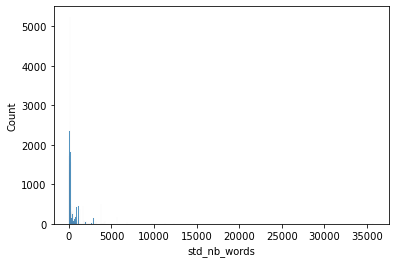

In [41]:

sns.histplot(x="std_nb_words",  data=df3)

In [42]:
dfgrps = df2.groupby(["From", "body_len"]).groups
keys = list(dfgrps.keys())
k = keys[0]
k[1]
keys_1 = [k for k in keys if k[1] == 1]

In [43]:
keys_1

[('acorey@gunster.com', 1),
 ('amandatease', 1),
 ('catherine@sheltondean.com', 1),
 ('invalid', 1),
 ('jeneane.nuzzo@heart.org', 1),
 ('jt@inkbridge.com', 1),
 ('kim@inkbridge.com', 1),
 ('korenltaylor', 1),
 ('paigecarter', 1)]

In [ ]:
dfg = df2.groupby(["From", "body_len"])

In [ ]:
for k in keys_1:
   print("==> ", dfg.get_group(k).body)

In [ ]:
df.From.to_csv("from.csv", index=0)

In [ ]:
body_list = eval(bodies[0])

In [ ]:
type(bodies[0])

---

In [ ]:
# Number of words. All words that don't relate to the email itself should be removed.
# We'll do that at a later stsage. 


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
words = [len([i for i in nlp(re.sub('</b>|<b>', '', i2)) if not (i.is_space or i.is_punct)]) for i2 in body]

In [ ]:
words = nlp(body)
body

In [ ]:
nb_words = len(words)
nb_chars = len(body)
nb_words, nb_chars

We must remove punctuation, and special characters. Lookint at the list below, perhaps remove phone numbers, any numbers, hyphens? 
I can also create my own parser? 
Read about [Spacy](https://spacy.io/usage/spacy-101#features).

In [ ]:
words

In [ ]:
for w in words:
    print(w)

In [ ]:
for ent in words.ents:
    print(ent, ",,", ent.text, ent.start_char, ent.end_char, ent.label_)